In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# caricamento dataset
data1 = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")
data1

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15026,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15027,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15029,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [3]:
X = data1.iloc[:,:-1] # Permessi android di tipo booleano.
y = data1['class'] #1 malware, 0 good
labels = set(y)

In [4]:
#Feature selection con backwar_elimination
import statsmodels.api as sm
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

featuresSelect = backward_elimination(X,y)
X = X[featuresSelect]
X[featuresSelect]

,transact,onServiceConnected,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.net.URLDecoder,android.telephony.SmsManager,READ_PHONE_STATE,...,WRITE_CONTACTS,android.intent.action.ACTION_POWER_CONNECTED,ACCESS_MOCK_LOCATION,MODIFY_PHONE_STATE,CHANGE_COMPONENT_ENABLED_STATE,CLEAR_APP_CACHE,READ_CONTACTS,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_SECURE_SETTINGS
0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15026,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
15027,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
15028,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
15029,1,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [5]:
#test con più classificatori e valutazioni dei classificatori
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for clf in [tree.DecisionTreeClassifier(), 
            svm.LinearSVC(), 
            svm.SVC(decision_function_shape='ovo')
           ]:
    start = time.time()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    res_time = round(time.time()-start, 2)
    predictions = clf.predict(X_test)
    print(clf, accuracy, res_time , 'seconds')
    print(classification_report(y_test, predictions))

DecisionTreeClassifier() 0.970973594033461 0.27 seconds
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3126
           1       0.96      0.96      0.96      1835

    accuracy                           0.97      4961
   macro avg       0.97      0.97      0.97      4961
weighted avg       0.97      0.97      0.97      4961

LinearSVC() 0.9776254787341262 0.32 seconds
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3126
           1       0.97      0.96      0.97      1835

    accuracy                           0.98      4961
   macro avg       0.98      0.97      0.98      4961
weighted avg       0.98      0.98      0.98      4961

SVC(decision_function_shape='ovo') 0.9818584962709132 5.63 seconds
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3126
           1       0.99      0.96      0.98      1835

    accuracy   

In [6]:
#classificatore randomforest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9858899415440435


In [7]:
from sklearn.metrics import classification_report
predictions = clf.predict(X_test)
print(clf, classification_report(y_test, predictions))

RandomForestClassifier()               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3126
           1       0.99      0.97      0.98      1835

    accuracy                           0.99      4961
   macro avg       0.99      0.98      0.98      4961
weighted avg       0.99      0.99      0.99      4961



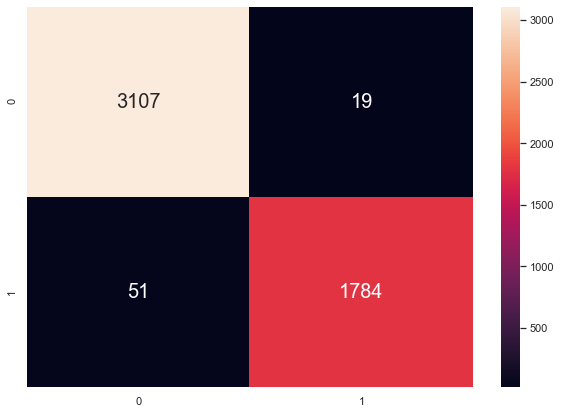

In [8]:
#confusion matrix Randomforest
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score
labels = set(y)
cm = confusion_matrix(y_test, clf.predict(X_test))
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 20}, 
            xticklabels=labels, yticklabels=labels)# font size
plt.show()

In [9]:
#verifica feature più importanti
KBEST = 16  # uso una variabile per indicare quante features voglio selezionare

from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif,k=KBEST)
select.fit(X,y)
mask = select.get_support()
np_mask = np.array(mask)
np_columns = np.array(X.columns[:]) # la prima è "label" e non va considerata...
# numpy ci permette la selezione di elementi tramite maschera booleana
# selezioniamo le features più significative...
most_significative_features = np_columns[np_mask] 
# ... e i rispettivi valori di importanza
most_significative_features_importances = clf.feature_importances_[np_mask]

#print(most_significative_features)
#print(most_significative_features_importances)

# accoppiamo i feature con le relative importanze
# e le stampiamo
importance_per_feature = zip(most_significative_features, most_significative_features_importances)
importance_per_feature = sorted(list(importance_per_feature), key = lambda x: -x[1])
for i in importance_per_feature:
    print(i)

('SEND_SMS', 0.08359568137233643)
('transact', 0.06461518134195429)
('READ_PHONE_STATE', 0.0517447027532557)
('android.os.Binder', 0.04913633066676715)
('onServiceConnected', 0.04590202856592161)
('android.telephony.SmsManager', 0.03988634845487745)
('ServiceConnection', 0.03671486788183453)
('Ljava.lang.Class.getCanonicalName', 0.028102531138733258)
('Ljava.net.URLDecoder', 0.02680311824946535)
('RECEIVE_SMS', 0.023653553562624424)
('ClassLoader', 0.016348483507947157)
('Landroid.content.Context.registerReceiver', 0.015313237236181765)
('Landroid.content.Context.unregisterReceiver', 0.014514831221095119)
('Ljava.lang.Class.getMethods', 0.012952442608661987)
('READ_SMS', 0.010593996423191332)
('Ljava.lang.Class.getDeclaredField', 0.007547426556621301)


In [10]:
#conteggio feature dei malware
counter = pd.Series(data1[data1['class']==1].sum(axis=0))
counter_malware = np.zeros(0).astype('int')
features = np.zeros(0).astype('str')
for feature in importance_per_feature:
    counter_malware= np.append(counter_malware,counter[feature[0]])
    features = np.append(features,feature[0])
    print(feature[0],counter[feature[0]])

SEND_SMS 2999
transact 324
READ_PHONE_STATE 4946
android.os.Binder 698
onServiceConnected 458
android.telephony.SmsManager 2256
ServiceConnection 462
Ljava.lang.Class.getCanonicalName 242
Ljava.net.URLDecoder 686
RECEIVE_SMS 2139
ClassLoader 1433
Landroid.content.Context.registerReceiver 1355
Landroid.content.Context.unregisterReceiver 965
Ljava.lang.Class.getMethods 144
READ_SMS 2085
Ljava.lang.Class.getDeclaredField 1318


In [11]:
#conteggio feature dei good
counter = pd.Series(data1[data1['class']==0].sum(axis=0))
counter_good = np.zeros(0).astype('int')
for feature in importance_per_feature:
    counter_good= np.append(counter_good,counter[feature[0]])
    print(feature[0],counter[feature[0]])

SEND_SMS 559
transact 6088
READ_PHONE_STATE 4563
android.os.Binder 6623
onServiceConnected 6257
android.telephony.SmsManager 529
ServiceConnection 6228
Ljava.lang.Class.getCanonicalName 4732
Ljava.net.URLDecoder 5457
RECEIVE_SMS 675
ClassLoader 6395
Landroid.content.Context.registerReceiver 6214
Landroid.content.Context.unregisterReceiver 5445
Ljava.lang.Class.getMethods 4102
READ_SMS 723
Ljava.lang.Class.getDeclaredField 5854


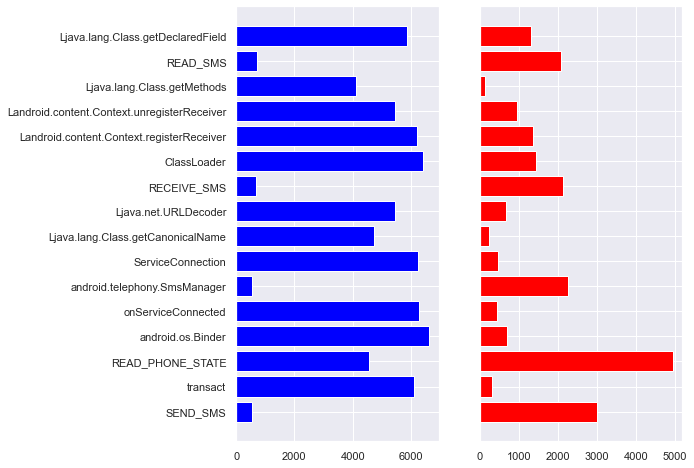

In [12]:
#confronto tra good e malware nelle feature più importanti
import matplotlib.pyplot as plt
plt.subplots(ncols=2,figsize=(8, 8))
plt.subplot(121)
plt.barh(features,counter_good, color="blue")
plt.subplot(122)
plt.barh(features,counter_malware, color="red",tick_label=" ")

plt.show()

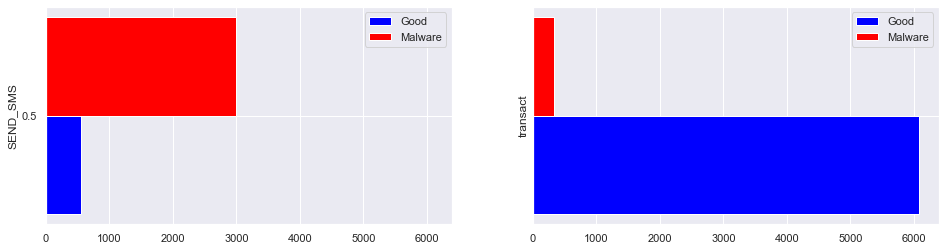

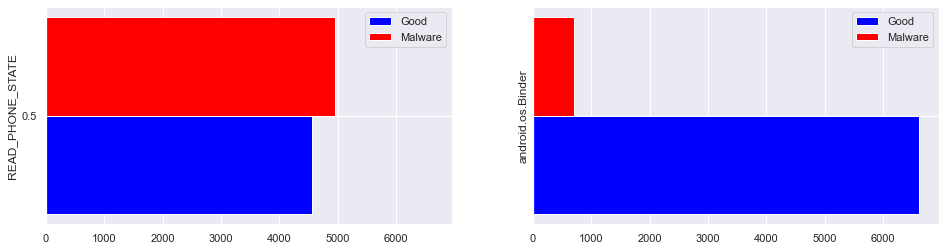

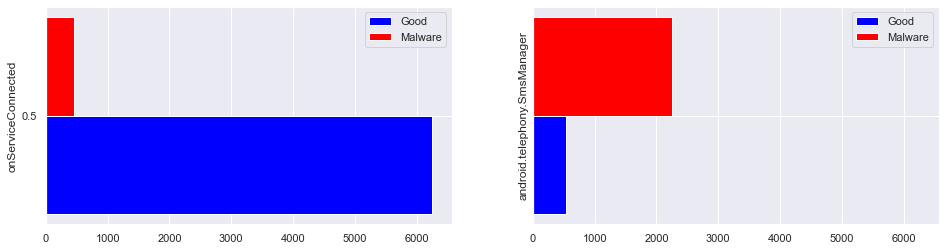

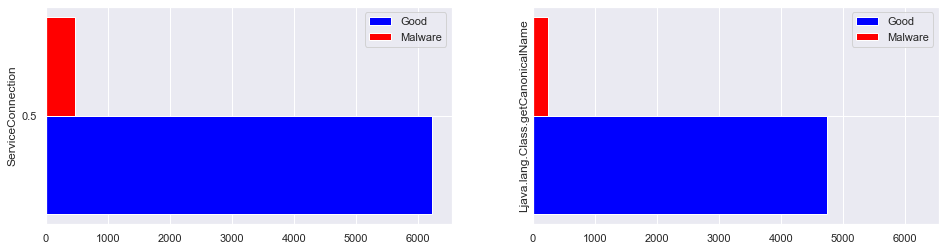

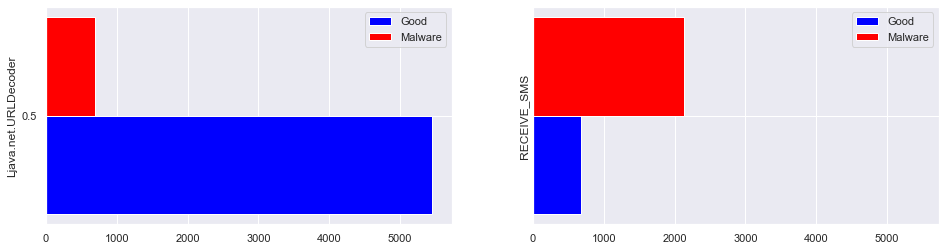

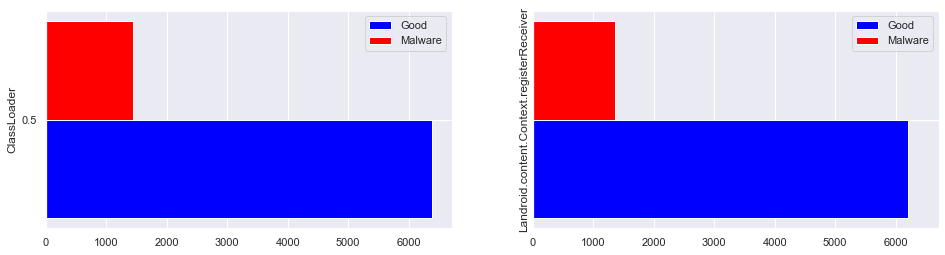

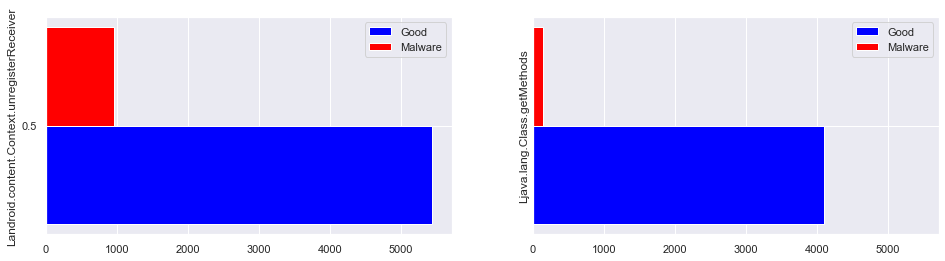

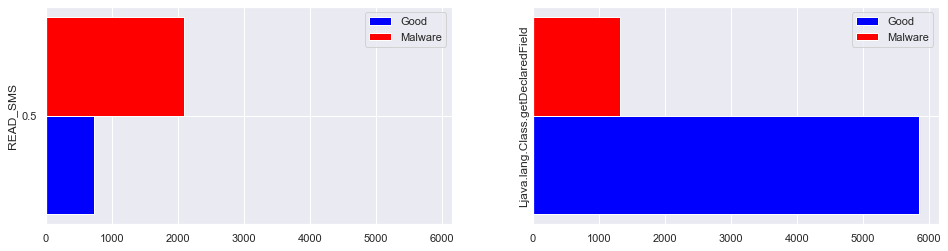

In [13]:
#confronto tra good e malware nelle feature più importanti singoli
bar_width = 1
i = 0;
while (i<16):
    index = np.arange(1)
    fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, sharex=True,figsize=(16, 4))
    good = ax1.barh(index, counter_good[i], bar_width,
                    label="Good",color="blue")

    malware = ax1.barh(index+bar_width, counter_malware[i],
                     bar_width, label="Malware", color = "red")
    ax1.set_yticks(index + bar_width / 2)
    ax1.set_ylabel(features[i])
    #ax.set_xscale('log')
    ax1.legend()
    
    i+=1;
    good = ax2.barh(index, counter_good[i], bar_width,
                    label="Good",color="blue")

    malware = ax2.barh(index+bar_width, counter_malware[i],
                     bar_width, label="Malware", color = "red")
    ax2.set_yticks(index + bar_width / 2)
    ax2.set_ylabel(features[i])
    #ax.set_xscale('log')
    ax2.legend()

    plt.show()
    i+=1;

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


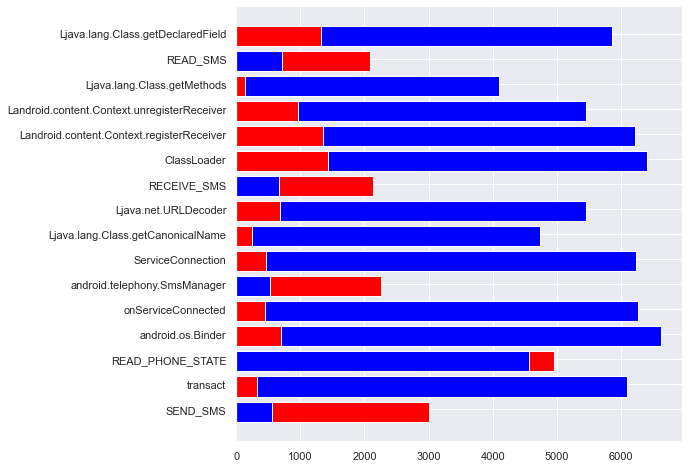

In [14]:
#confronto tra good e malware nelle feature più importanti
bar_width = 0.4
fig,ax = plt.subplots(figsize=(8, 8),sharey=True, sharex=True)
for i in range(0,16):
    index = np.arange(16)
    if(counter_good[i]<counter_malware[i]):
        ax.barh(bar_width*1.25*i,counter_malware[i],bar_width,label="Malware", color="red")
        ax.barh(bar_width*1.25*i,counter_good[i],bar_width,label="Good", color="blue")
    else:
        ax.barh(bar_width*1.25*i,counter_good[i],bar_width,label="Good", color="blue")
        ax.barh(bar_width*1.25*i,counter_malware[i],bar_width,label="Malware", color="red")
    
ax.set_yticks(index/2+(bar_width+0.1/2)-bar_width)
ax.set_yticklabels(features)

        
print(index)
plt.show()